<a href="https://colab.research.google.com/github/brunotagoncalves/publicdataml/blob/main/Feature_engineering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 2.	Feature engineering


In [56]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [72]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [145]:
pd_df = pd.read_csv('drive/MyDrive/publicdataml/sample_data.csv',index_col=0,dtype='object')

In [146]:
pd_df.subclasse = pd_df.subclasse.str.zfill(7)
for i in range(1,pd_df.subclasse.str.len().max()):
  pd_df.loc[:,'subclasse_dig'+str(i)] = pd_df.loc[:,'subclasse'].str[:i]  

In [148]:
pd_df.loc[:,'cbo2002ocupação'] = pd_df.loc[:,'cbo2002ocupação'].str.zfill(6)
for i in range(1,pd_df.loc[:,'cbo2002ocupação'].str.len().max()):
  pd_df.loc[:,'cbo_dig'+str(i)] = pd_df.loc[:,'cbo2002ocupação'].str[:i]  

In [159]:
for i in range(3,pd_df.loc[:,'município'].str.len().max()):
  pd_df.loc[:,'município_dig'+str(i)] = pd_df.loc[:,'município'].str[:i]  

In [169]:
pd_df.groupby(['graudeinstrução','Descrição_graudeinstrução'])['salário'].describe().sort_values('mean') # não parece ordinal

,,count,mean,std,min,25%,50%,75%,max
graudeinstrução,Descrição_graudeinstrução,,,,,,,,
6,Médio Incompleto,28606.0,1119.852143,3184.622969,400.0,522.500,626.36,1150.0000,99000.0
2,Até 5ª Incompleto,4669.0,1467.397288,1737.301334,400.0,1045.000,1146.35,1609.5300,78264.0
1,Analfabeto,850.0,1498.188106,2116.932185,454.0,1045.000,1064.10,1486.5475,42857.0
4,6ª a 9ª Fundamental,11321.0,1513.291616,3898.760640,400.0,643.960,1108.38,1559.0000,99800.0
3,5ª Completo Fundamental,3611.0,1594.037696,2565.516235,400.0,1045.000,1194.05,1700.0000,78264.0
5,Fundamental Completo,16673.0,1647.130728,2954.216603,400.0,1040.000,1250.00,1711.6000,88530.0
7,Médio Completo,132467.0,1714.903787,3450.582861,400.0,998.000,1189.00,1679.6050,99800.0
8,Superior Incompleto,11235.0,2083.067958,2663.666766,400.0,950.000,1400.00,2751.5200,81000.0
9,Superior Completo,34133.0,4461.238911,4732.692511,400.0,2000.000,3307.23,5200.0000,99000.0


In [149]:
pd_df.dtypes

município                    object
tamestabjan                  object
raçacor                      object
sexo                         object
graudeinstrução              object
cbo2002ocupação              object
categoria                    object
subclasse                    object
seção                        object
uf                           object
região                       object
competência                  object
saldomovimentação            object
idade                        object
horascontratuais             object
tipoempregador               object
tipoestabelecimento          object
tipomovimentação             object
tipodedeficiência            object
indtrabintermitente          object
indtrabparcial               object
salário                      object
indicadoraprendiz            object
fonte                        object
faixapnad                    object
Descrição_região             object
Descrição_uf                 object
Descrição_município         

In [150]:
pd_df.loc[:,'salário'] = pd_df.loc[:,'salário'].astype('float')
pd_df.loc[:,'idade'] = pd_df.loc[:,'idade'].astype('int')
pd_df.loc[:,'pop_estimada'] = pd_df.loc[:,'pop_estimada'].astype('float')
pd_df.loc[:,'horascontratuais'] = pd_df.loc[:,'horascontratuais'].astype('int')


In [151]:
pd_df.groupby('horascontratuais')['salário'].describe().sort_values('mean',ascending=False).head(20)

,count,mean,std,min,25%,50%,75%,max
horascontratuais,,,,,,,,
59,13.0,6319.610000,7658.767609,401.65,1336.7000,2932.380,7100.0000,21688.14
0,8060.0,6199.544871,7046.458562,404.10,1841.6775,5316.000,7502.0000,99000.00
40,15067.0,4550.533677,4804.465871,400.00,1615.4700,3243.730,5722.7650,99800.00
56,153.0,3743.928758,5273.223481,438.00,1109.3700,2444.870,4219.0600,56000.00
37,260.0,3729.778500,5605.399066,407.50,1054.0000,1911.565,3580.3125,45000.00
11,165.0,3181.586364,9242.024838,400.00,541.5000,727.200,3168.0000,95634.00
49,163.0,3131.040798,3338.703892,466.78,1045.0000,1430.000,3536.0500,15000.00
43,1228.0,2839.620244,5100.217277,433.61,1188.5700,1546.105,2775.1125,90000.00
41,618.0,2838.880307,2565.549927,405.00,1280.2950,2000.000,3365.8800,29454.91


In [152]:

#pd_df.loc[:,'salário']
pd_df.loc[pd_df.loc[:,'horascontratuais']<20,'horascontratuais'] = pd_df.horascontratuais.median()

In [153]:
pd_df.loc[:,'valorhora'] = pd_df.loc[:,'salário']/pd_df.horascontratuais
pd_df.loc[:,'valorhora'].describe()

count    249488.000000
mean         53.726779
std         102.657430
min           4.040404
25%          24.541500
50%          30.522727
75%          47.727273
max        4990.000000
Name: valorhora, dtype: float64

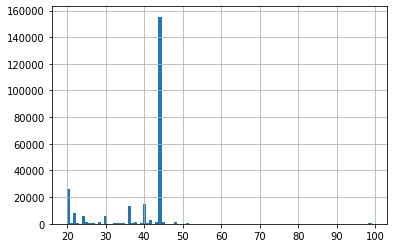

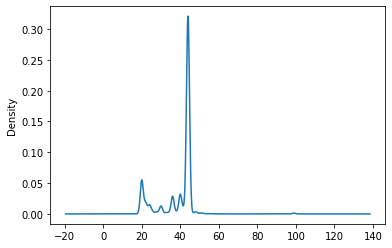

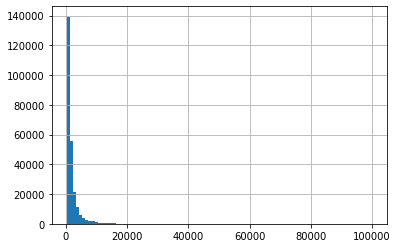

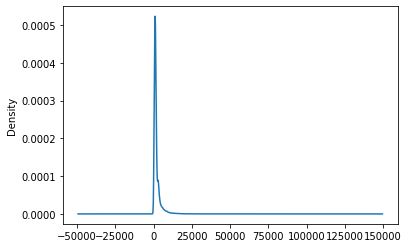

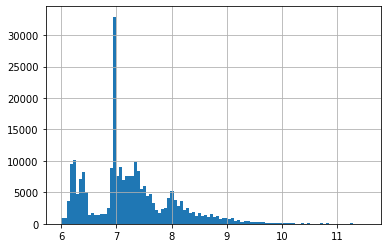

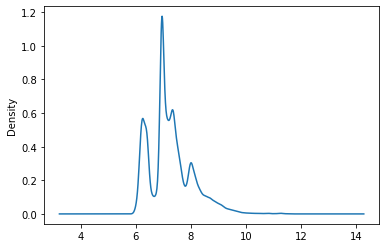

In [154]:
pd_df.horascontratuais.hist(bins=100)
plt.show()
pd_df.horascontratuais.plot.density()
plt.show()
pd_df.loc[:,'salário'].hist(bins=100)
plt.show()
pd_df.loc[:,'salário'].plot.density()
plt.show()
np.log1p(pd_df.loc[:,'salário']).hist(bins=100)
plt.show()
np.log1p(pd_df.loc[:,'salário']).plot.density()
plt.show()

In [171]:
cat_cols = pd_df.columns[pd_df.columns.str.contains('Descrição|dig')].tolist()
cat_cols

['Descrição_região',
 'Descrição_uf',
 'Descrição_município',
 'Descrição_seção',
 'Descrição_subclasse',
 'Descrição_categoria',
 'Descrição_cbo2002ocupação',
 'Descrição_graudeinstrução',
 'Descrição_sexo',
 'Descrição_raçacor',
 'Descrição_tamestabjan',
 'subclasse_dig1',
 'subclasse_dig2',
 'subclasse_dig3',
 'subclasse_dig4',
 'subclasse_dig5',
 'subclasse_dig6',
 'cbo_dig1',
 'cbo_dig2',
 'cbo_dig3',
 'cbo_dig4',
 'cbo_dig5',
 'município_dig3',
 'município_dig4',
 'município_dig5']

In [172]:
int_cols = pd_df.columns[pd_df.columns.str.contains('idade|pop_')].tolist()


In [175]:
target_cols = pd_df.columns[pd_df.columns.str.contains('salário|valor')].tolist()
target_cols

['salário', 'valorhora']

In [177]:
pd_df.loc[:,cat_cols+int_cols+target_cols].to_csv('drive/MyDrive/publicdataml/sample_data_featured.csv')